# Building Intrusion Detection System using Artificial Neural Networks
## Data Clean up and Pre-Processing

In [1]:
#Importing desired modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("ids.csv")
df = pd.DataFrame(dataset)
df.info()

/home/tulsyan/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 Destination Port               692703 non-null int64
 Flow Duration                  692703 non-null int64
 Total Fwd Packets              692703 non-null int64
 Total Backward Packets         692703 non-null int64
Total Length of Fwd Packets     692703 non-null int64
 Total Length of Bwd Packets    692703 non-null int64
 Fwd Packet Length Max          692703 non-null int64
 Fwd Packet Length Min          692703 non-null int64
 Fwd Packet Length Mean         692703 non-null float64
 Fwd Packet Length Std          692703 non-null float64
Bwd Packet Length Max           692703 non-null int64
 Bwd Packet Length Min          692703 non-null int64
 Bwd Packet Length Mean         692703 non-null float64
 Bwd Packet Length Std          692703 non-null float64
Flow Bytes/s                    691695 non-null object
 Flow Packets/s                 692703 non-null object
 Flow IAT Mean 

In [3]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [4]:
#Checking the shape of the complete datset
df.shape
#Rounding the data to two decimal places
df = df.round(2)

### 692703 rows × 79 columns is the size of the original data

In [5]:
#Replacing infinity values with NaN
df.replace([np.inf, -np.inf], np.nan)
#Removing rows containing NaN 
df.dropna(how="any", inplace = True)

In [6]:
#Shape after removinf NaNs
df.shape

(691695, 79)

In [7]:
# Since the data contains 79 parameters,which will require quite a lot of processing,
# so we are dropping columns with either constant value or very much divergent values
df = df.drop(df.std()[df.std() < .3].index.values, axis=1)
df = df.drop(df.std()[df.std() > 1000].index.values, axis=1)

In [8]:
#new shape of the dataset after dropping the columns with divergent values
df.shape

(691695, 24)

In [9]:
#Various types of labels associated with the dataset
df[' Label'].value_counts()

BENIGN              439972
DoS Hulk            230124
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name:  Label, dtype: int64

<!-- ### Labels associated with data
BENIGN              439972
DoS Hulk            230124
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11 -->

([<matplotlib.patches.Wedge at 0x7f3f4bd7c518>,
 [Text(-1.1830056228811299, -0.5389783819705855, 'BENIGN'),
  Text(1.4193539458189848, 0.4852158040378313, 'DoS Hulk'),
  Text(0.2531206438489331, 1.681050248998376, 'DoS GoldenEye'),
  Text(0.14497331574252167, 1.8944610678825309, 'DoS slowloris'),
  Text(0.05265301616305486, 2.099339815248816, 'DoS Slowhttptest'),
  Text(0.00012439429575789647, 2.499999996905212, 'Heartbleed')],
 [Text(-0.7280034602345413, -0.331679004289591, '63.6%'),
  Text(0.9462359638793232, 0.3234772026918875, '33.3%'),
  Text(0.17867339565807042, 1.1866237051753241, '1.5%'),
  Text(0.10682244317870018, 1.3959186815976543, '0.8%'),
  Text(0.040116583743279886, 1.5994970020943362, '0.8%'),
  Text(9.951543660631718e-05, 1.9999999975241696, '0.0%')])

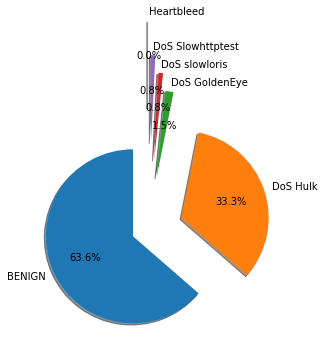

In [10]:
#Pie chart representing share of different type of Label
labels = 'BENIGN', 'DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest', 'Heartbleed'
fig, ax = plt.subplots()
values = df[' Label'].value_counts()
explodeTuple = (0.2, 0.4, 0.6, 0.8, 1.0, 1.4)
ax.pie(values, explode = explodeTuple, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

In [11]:
# Since distribution opf various Denial of Service (DoS) is highly irregular, we have clubbed them for better results
df = df.replace('Heartbleed', 'DoS')
df = df.replace('DoS GoldenEye', 'DoS')
df = df.replace('DoS Slowhttptest', 'DoS')
df = df.replace('DoS slowloris', 'DoS')
df = df.replace('DoS Hulk', 'DoS')
df[' Label'].value_counts()

BENIGN    439972
DoS       251723
Name:  Label, dtype: int64

In [12]:
df = df[~df['Flow Bytes/s'].isin(['Infinity'])]
df = df[~df[' Flow Packets/s'].isin(['Infinity'])]
df.shape

(691406, 24)

In [13]:
#Processing aroung 700k data is quite a time consuming task, we are taking only 100k for our training and testing our model
df = df.iloc[:100000]

In [14]:
#Final shape of the data after cleanup and pre-processing
df.shape

(100000, 24)

### 100000 rows × 24 columns is the size of the new data

In [15]:
df[' Label'].value_counts()

BENIGN    64282
DoS       35718
Name:  Label, dtype: int64

([<matplotlib.patches.Wedge at 0x7f3f4a9854e0>,
 [Text(-1.0812233877505313, -0.5205343271881928, 'BENIGN'),
  Text(1.0812233877505315, 0.5205343271881923, 'DoS')],
 [Text(-0.6307136428544765, -0.30364502419311246, '64.3%'),
  Text(0.6307136428544767, 0.3036450241931121, '35.7%')])

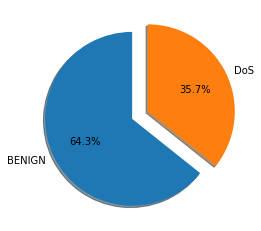

In [16]:
#Plotting pie chart of labels associated with row to show ratio of both types of Labels
label = 'BENIGN', 'DoS'
value = df[' Label'].value_counts()
fig1, ax1 = plt.subplots()
explodeTuple = (0.1, 0.1)
ax1.pie(value, explode = explodeTuple, labels = label, autopct='%1.1f%%',
        shadow=True, startangle=90)


In [17]:
#Importing various packages and libraries 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from IPython.display import SVG
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.vis_utils import model_to_dot
from keras.models import Sequential
from keras.layers import Dense, Activation

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWar

In [18]:
#Replacing labels with 1 and 0 for convenience
df.replace(to_replace ="BENIGN", value = 1, inplace = True)
df.replace(to_replace ="DoS", value = 0, inplace = True)

In [19]:
#First five rows of the data
df.head()

,Total Fwd Packets,Total Backward Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,...,ACK Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Bwd Packets,act_data_pkt_fwd,min_seg_size_forward,Label
0,1,1,6,6,6.00,0.00,6,6.00,313.250496,52.208416,...,1,1,9.00,6.00,6.00,1,1,0,20,1
1,11,5,79,0,15.64,31.45,0,65.20,1039665.971,33402.92276,...,0,0,31.12,15.64,65.20,11,5,4,32,1
2,10,6,1575,0,315.00,632.56,0,525.00,5753424.658,14611.87215,...,0,0,393.75,315.00,525.00,10,6,3,32,1
3,17,12,1313,0,203.06,425.78,0,555.00,665000.6576,1907.141918,...,0,0,348.69,203.06,555.00,17,12,10,32,1
4,9,6,1575,0,350.00,694.51,0,525.33,5771062.271,13736.26374,...,0,0,420.13,350.00,525.33,9,6,2,32,1


In [20]:
x = df.drop(' Label', 1)
y = df[' Label']

In [21]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [23]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [24]:
print('Train images shape:', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Test images shape:', X_test.shape)
print('Test labels shape:', y_test.shape)
print('Train labels:', y_train)
print('Test labels:', y_test)

Train images shape: (80000, 23)
Train labels shape: (80000,)
Test images shape: (20000, 23)
Test labels shape: (20000,)
Train labels: [0 1 1 ... 0 1 1]
Test labels: [0 1 0 ... 0 0 0]


In [25]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim = 23))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [26]:
# For a binary classification problem
from keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss = "binary_crossentropy", optimizer = opt, metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [27]:
history = model.fit(X_train, y_train, epochs=20,
          verbose=1, batch_size=100)


Epoch 1/20
80000/80000 [==============================] - 2s 26us/step - loss: 0.6034 - accuracy: 0.7245
Epoch 2/20
80000/80000 [==============================] - 2s 22us/step - loss: 0.4835 - accuracy: 0.8191
Epoch 3/20
80000/80000 [==============================] - 2s 24us/step - loss: 0.4340 - accuracy: 0.8240
Epoch 4/20
80000/80000 [==============================] - 2s 25us/step - loss: 0.4011 - accuracy: 0.8285
Epoch 5/20
80000/80000 [==============================] - 2s 25us/step - loss: 0.3689 - accuracy: 0.8339
Epoch 6/20
80000/80000 [==============================] - 2s 22us/step - loss: 0.3353 - accuracy: 0.8479
Epoch 7/20
80000/80000 [==============================] - 2s 22us/step - loss: 0.3027 - accuracy: 0.8633
Epoch 8/20
80000/80000 [==============================] - 2s 21us/step - loss: 0.2759 - accuracy: 0.8735
Epoch 9/20
80000/80000 [==============================] - 2s 22us/step - loss: 0.2575 - accuracy: 0.8778
Epoch 10/20
80000/80000 [=============================

In [28]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

20000/20000 [==============================] - 0s 16us/step
Test loss: 0.19741094299554826
Test accuracy: 0.8965499997138977


dict_keys(['loss', 'accuracy'])


KeyError: 'val_accuracy'

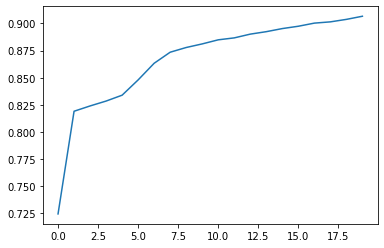

In [29]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
def plot_keras_model(model, show_shapes=True, show_layer_names=True):
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    return SVG(model_to_dot(model, show_shapes=show_shapes, show_layer_names=show_layer_names).create(prog='dot', format='svg'))

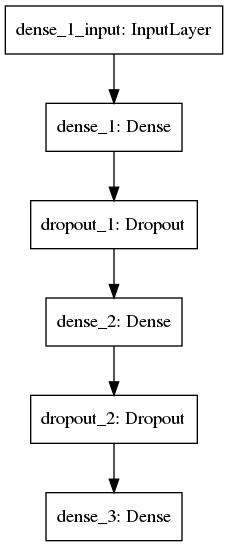

In [31]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [32]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [33]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7171,    54],
       [ 2015, 10760]])